In [1]:
import numpy as np

# Getting Matrix Values
mCSV = np.genfromtxt("31-linear-equation.csv", skip_header=1, delimiter=",", dtype=float)
mCSVt = np.transpose(mCSV)

# Set the floatmode to 'fixed'
np.set_printoptions(floatmode='fixed')

# Display the transposed CSV data
print(mCSVt.astype(int))

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
 [ 5  9 13 17 21 25 29 33 37 41 45 49 53]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Setup numpy
np.set_printoptions(
  precision=2,
  formatter={
    'int':   '{:30,d}'.format,
    'float': '{:10,.8f}'.format
  },
  linewidth=np.inf,
  suppress=True)

In [4]:
# Getting Matrix Values
mCSV = np.genfromtxt("31-linear-equation.csv",
  skip_header=1, delimiter=",", dtype=float)

mCSVt   = np.transpose(mCSV)
x_values = mx = mCSVt[0]
y_values = mB = mCSVt[1]

In [5]:
# Initial Matrix Value
order = 1

In [6]:
# Perform linear regression using polyfit
mC = np.polyfit(x_values, y_values, deg=order)
print('Using polyfit')
print(f'Coefficients (a, b):\n\t{np.flip(mC)}\n')

Using polyfit
Coefficients (a, b):
	[5.00000000 4.00000000]



In [8]:
# Calculated Matrix Variable
mA    = np.flip(np.vander(mx, order+1), axis=1)
mAt   = np.transpose(mA)
mAt_A = mAt @ mA
mAt_B = mAt @ mB
mC    = np.linalg.solve(mAt_A, mAt_B)

[a, b] = mC
print('Calculate manually')
print(f'Coefficients (a, b):\n\t{mC}\n')

Calculate manually
Coefficients (a, b):
	[5.00000000 4.00000000]



Text(0.5, -0.01, 'a = 5.00, b = 4.00')

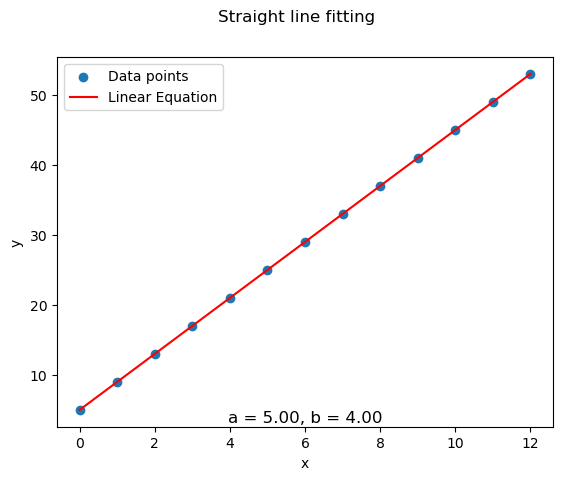

In [9]:
# Draw Plot
x_plot = np.linspace(min(mx), max(mx), 100)
y_plot = a + b * x_plot

plt.scatter(mx, mB, label='Data points')
plt.plot(x_plot, y_plot, color='red',
  label='Linear Equation')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.suptitle(
  'Straight line fitting')

subfmt = "a = %.2f, b = %.2f"
plt.title(subfmt % (a, b), y=-0.01)